# Facial Keypoint Detection Kaggle Competition

Kaggle competition to detect eyes, mouth and nose in grayscaled images.

In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
%aimport keypoints
%aimport plots

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
(X, Y, header) = keypoints.df_train()

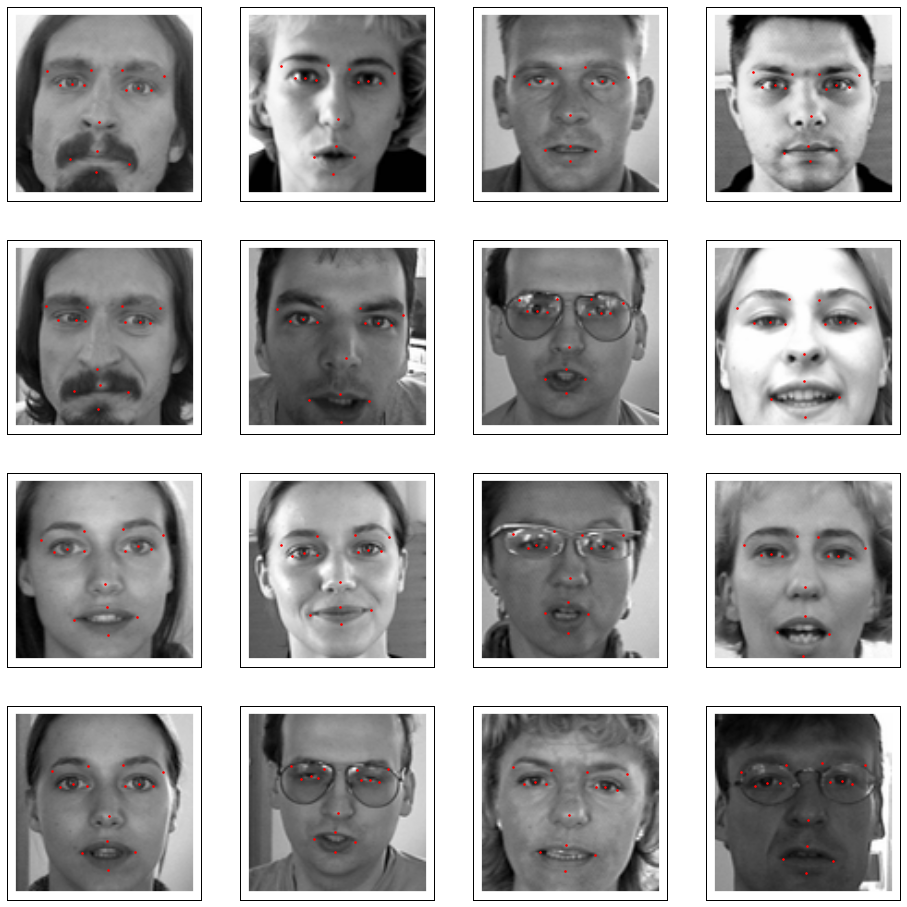

In [37]:
plots.show_imgs(X, Y)

In [38]:
model = keypoints.train(X, Y)
Xtest = keypoints.df_test()
Ytest = pd.DataFrame(model.predict(Xtest))

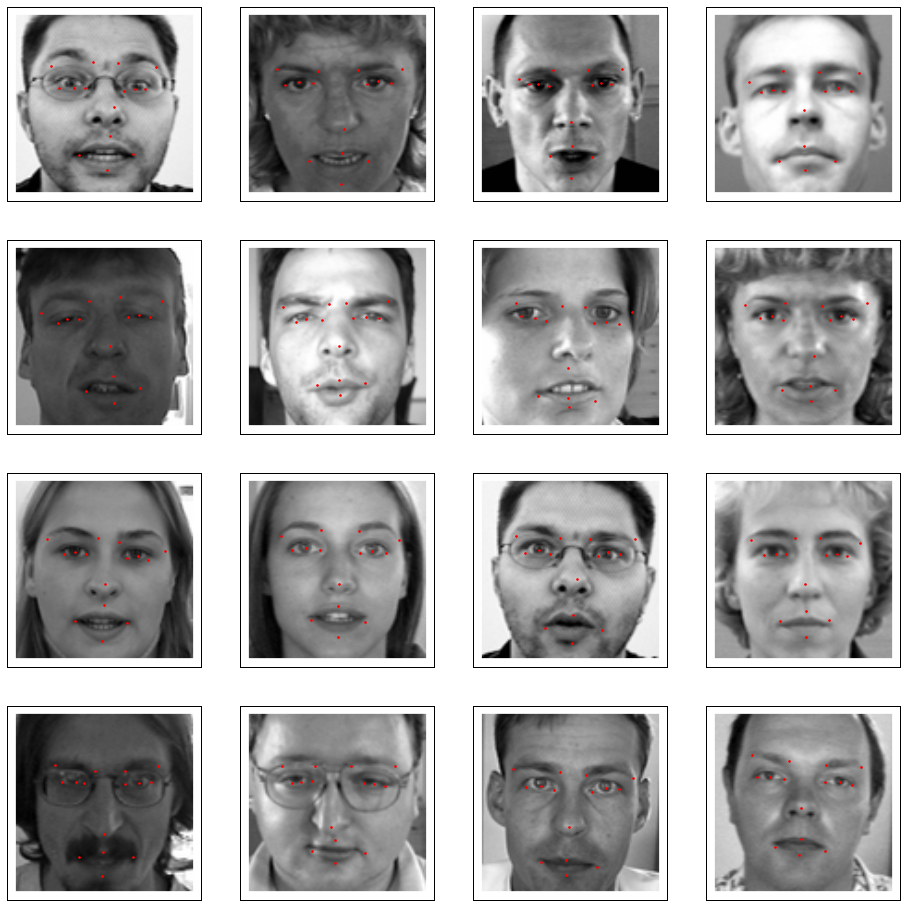

In [39]:
plots.show_imgs(Xtest, Ytest)

In [46]:
lookup = keypoints.df_lookup(header)
S = keypoints.submission_format(Ytest, lookup)

In [50]:
Ytest

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,63.991754,39.197011,30.875136,39.039367,58.121246,40.283803,69.501190,39.562262,36.950609,38.974348,...,52.751978,49.137893,63.157389,74.622364,33.718146,75.280380,50.366953,65.123510,49.190326,83.168511
1,69.899118,35.184886,26.816475,35.448372,63.643535,36.660556,76.685998,36.141223,34.175274,36.283901,...,51.399808,60.926299,64.458165,78.479479,32.430233,78.387789,49.949315,74.199728,49.459616,90.860823
2,64.495864,36.071352,30.265977,36.852919,59.652582,37.326287,69.885023,36.849918,36.296491,37.840305,...,47.839041,57.459363,59.396803,76.417880,36.365455,75.636756,48.431169,70.435287,47.898488,87.830161
3,66.534467,38.691626,31.224919,39.782071,59.590984,40.257903,73.653232,40.138465,36.591574,40.498252,...,47.952127,50.477596,64.802529,78.337236,34.251084,78.413050,47.963727,70.367773,48.562618,83.476981
4,66.265270,35.340657,27.205546,37.508351,60.693033,36.710555,72.495006,36.438975,33.625896,38.005709,...,50.503372,52.679276,66.938157,75.216297,37.712722,76.952725,52.110959,68.725132,52.692635,83.600274
5,63.405087,36.464053,30.733077,37.679494,56.135818,37.412532,70.215587,37.236168,39.016992,38.175820,...,48.304843,52.631175,62.486315,72.652179,36.440680,73.527284,48.563870,71.180421,48.903924,79.276217
6,66.859161,39.131319,28.239616,37.128919,60.494097,39.642733,74.175563,40.244789,34.667653,38.643788,...,46.615795,64.124536,60.942974,82.494670,30.282124,79.866602,46.192167,80.873825,47.077564,85.611145
7,68.188849,36.154338,30.422731,36.369515,62.388473,38.145509,74.815943,37.581710,36.404251,38.080492,...,53.302044,57.783232,64.864927,76.301340,36.171616,76.420839,51.428775,74.237404,51.823262,82.518646
8,66.050506,40.186441,31.799873,37.648999,60.091078,41.034541,71.324338,42.327759,37.723818,38.963364,...,47.983879,55.377499,60.127479,76.607596,31.799041,75.241405,47.099436,66.566392,46.311179,86.468277
9,66.538071,37.082286,30.365950,35.688940,59.962498,38.161903,73.994052,38.576246,37.983981,36.937443,...,48.365488,54.984585,62.414496,75.905445,33.206883,74.766370,47.727513,67.269025,48.049487,83.884282


In [51]:
1783 * 30

53490